In [1]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import MultiNiftiLabelsMasker
from nilearn import plotting
from nilearn import datasets

In [16]:
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
print(
    "Yeo atlas nifti image (3D) with 400 ROIs and 7 networks is located at: "
    f" is located at: {schaefer.maps}"
)

[get_dataset_dir] Dataset found in /Users/aj/nilearn_data/schaefer_2018
[fetch_single_file] Downloading data from https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_7Networks_order.txt ...
[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz ...
[fetch_single_file]  ...done. (0 seconds, 0 min)

Yeo atlas nifti image (3D) with 400 ROIs and 7 networks is located at:  is located at: /Users/aj/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


In [ ]:
schaefer_labels = schaefer.labels
print(schaefer_labels)

In [ ]:
print(schaefer.description)

In [11]:
data = datasets.fetch_development_fmri(n_subjects=10)

print(
    "Functional nifti images (4D, e.g., one subject) "
    f"are located at : {data.func[0]!r}"
)
print(
    "Counfound csv files (of same subject) are located "
    f"at : {data['confounds'][0]!r}"
)

[get_dataset_dir] Dataset created in /Users/aj/nilearn_data/development_fmri
[_add_readme_to_default_data_locations] Added README.md to /Users/aj/nilearn_data/development_fmri
[get_dataset_dir] Dataset created in /Users/aj/nilearn_data/development_fmri/development_fmri
[fetch_single_file] Downloading data from https://osf.io/yr3av/download ...
[fetch_single_file]  ...done. (1 seconds, 0 min)

[get_dataset_dir] Dataset found in /Users/aj/nilearn_data/development_fmri/development_fmri
[fetch_single_file] Downloading data from https://osf.io/download/5c8ff3df4712b400183b7092/ ...
[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5c8ff3e04712b400193b5bdf/ ...
[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5c8ff3e14712b400183b7097/ ...
[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5c8ff3e3

In [17]:
# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

# create masker using MultiNiftiLabelsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# computation
masker = MultiNiftiLabelsMasker(
    labels_img=schaefer.maps,  # Both hemispheres
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    n_jobs=2,
)

# extract time series from all subjects
time_series = masker.fit_transform(data.func, confounds=data.confounds)

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=schaefer.maps)

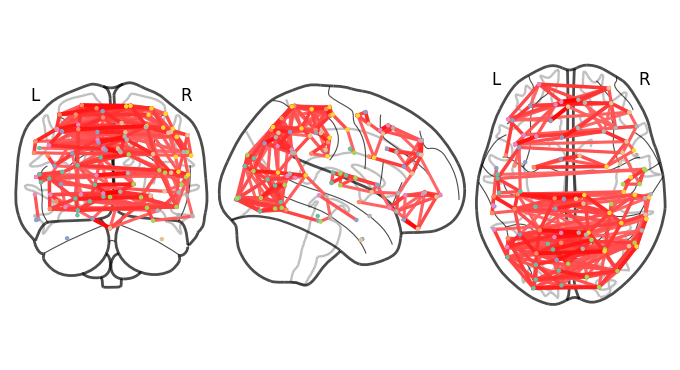

In [19]:
# plot connectome with 80% edge strength in the connectivity
connectome = plotting.plot_connectome(
    mean_correlation_matrix, coordinates, edge_threshold="95%", node_size=5
)